In [1]:
import os
import sys
while not os.getcwd().endswith('ml'):
    os.chdir('..')
sys.path.insert(0, os.getcwd())

In [2]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from sys import getsizeof

from kaggle_problems.riiid_test_answer_prediction.workspace.common import apply_to_train

In [3]:
input_dir = Path('kaggle_problems/riiid_test_answer_prediction/workspace/data')
batched_dir = input_dir / "batched_by_user_train"

In [55]:
def apply_to_train(files, f):
    for file in files:
        train = pickle.load(open(file, 'rb'))
        yield f(train)

In [4]:
lectures = pd.read_csv("{}/lectures.csv".format(input_dir))
questions = pd.read_csv("{}/questions.csv".format(input_dir))

print("len of lectures={}, len of questions={}".format(len(lectures), len(questions)))

len of lectures=418, len of questions=13523


In [29]:
input_dir = Path('kaggle_problems/riiid_test_answer_prediction/workspace/data')
batched_dir = Path('kaggle_problems/riiid_test_answer_prediction/workspace/data') / "batched_by_user_train"
model_dir = Path('kaggle_problems/riiid_test_answer_prediction/models')

FILE_LIST = [i for i in batched_dir.glob("*.pkl")]

In [5]:
lectures.sample(10)

,lecture_id,tag,part,type_of
16,1450,101,1,solving question
156,13471,47,5,solving question
260,21168,106,3,concept
64,5694,140,2,concept
204,16863,74,4,solving question
239,19411,36,1,concept
409,32175,82,4,concept
323,26004,168,5,solving question
224,18397,14,6,solving question
307,24570,152,5,solving question


In [7]:
questions.sample(10)

,question_id,bundle_id,correct_answer,part,tags
7774,7774,7770,0,7,97 42 35 146 122
8762,8762,8762,1,5,55
6219,6219,6219,2,5,8
5867,5867,5867,2,5,89
2760,2760,2758,3,4,136 150 81
4853,4853,4853,3,5,55
548,548,548,0,2,137 88 38 81
8973,8973,8973,2,5,53
11485,11485,11485,0,5,8
9249,9249,9249,2,5,123


In [8]:
questions[questions.bundle_id == 12468]

,question_id,bundle_id,correct_answer,part,tags
12468,12468,12468,3,4,74 12 29
12469,12469,12468,3,4,161 12 29
12470,12470,12468,1,4,136 12 29


In [ ]:
!jupyter nbconvert --to script kaggle_problems/riiid_test_answer_prediction/eda.ipynb

In [32]:
data = pickle.load(open(FILE_LIST[0], 'rb'))
data.sample(3)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
20357726,20357726,2332924819,436970333,590,False,591,0,1,19000.0,True
20277465,20277465,194234413,435490045,7897,False,27,0,1,24000.0,True
20989063,20989063,337671604,450233145,1950,False,205,2,1,6000.0,True


### Статистика по юзерам

In [63]:
def user_stats(data):
    users_stats = data[['user_id', 'row_id']].groupby('user_id').aggregate({'row_id': 'count'}).reset_index()
    users_stats.columns = ['user_id', 'user_count']
    return users_stats

In [67]:
data = pickle.load(open(FILE_LIST[0], 'rb'))
users_stats = user_stats(data)
users_stats.describe()

,user_id,user_count
count,3.938000e+03,3938.000000
mean,4.403715e+08,254.184358
std,6.213898e+06,751.177486
min,4.295021e+08,1.000000
25%,4.349782e+08,30.000000
50%,4.403508e+08,40.000000
75%,4.458418e+08,155.000000
max,4.509909e+08,15415.000000


In [69]:
data = pd.concat(apply_to_train(FILE_LIST, user_stats), axis=0)
users_stats = data[['user_id', 'user_count']].groupby('user_id').aggregate({'user_count': 'sum'}).reset_index()
users_stats.columns = ['user_id', 'user_count']
users_stats.describe()

,user_id,user_count
count,3.936560e+05,393656.000000
mean,1.076358e+09,257.154297
std,6.201319e+08,747.550934
min,1.150000e+02,1.000000
25%,5.387596e+08,30.000000
50%,1.077717e+09,41.000000
75%,1.613533e+09,157.000000
max,2.147483e+09,17917.000000


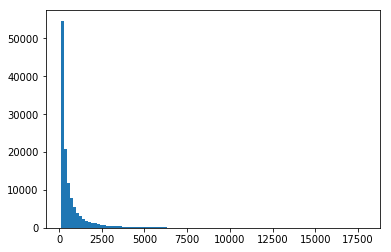

In [74]:
plt.hist(users_stats[users_stats['user_count'] > 100]['user_count'], bins=100)
plt.show()

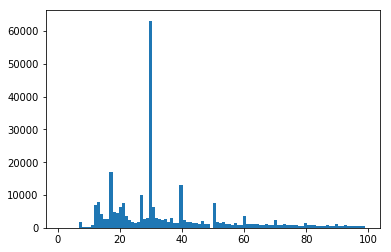

In [75]:
plt.hist(users_stats[users_stats['user_count'] < 100]['user_count'], bins=100)
plt.show()